# Enoncé du problème

L'objectif de ce projet est d'estimer la longueur de câble sous-marin nécessaire pour relier deux côtes $A$ et $B$  en utilisant des simulations conditionnelles.


Le câble reposera sur le fond marin dont la profondeur est inconnue.
Le segment $[AB]$ est discrétisé par une séquence de (N+1) points. On pose $x_0=A$ et pour $i=1,\dots,N$, $$x_i=x_0+i\Delta$$ où $$\Delta = \frac{AB}{N}$$ de telle sorte que $x_N=B$.
On note $z(x)$ la profondeur du fond marin au point $x$ de telle sorte qu'on pourra estimer la longueur totale de câble nécessaire par la somme des longueurs sur les segments de la discrétisation :

$$l=\sum_{i=1}^N\sqrt{\Delta^2+(z(x_i)-z(x_{i-1}))^2}.$$

Enfin, notons que l'on dispose d'un ensemble de $n$ observations de la profondeur que l'on supposera situées sur des points de discrétisation $z(x_{j_1}),\dots,z(x_{j_n})$.


On adopte un modèle probabiliste pour la profondeur. On suppose que le vecteur des profondeurs sur les points de discrétisation 
$\mathbf{z}=(z(x_0),\dots,z(x_N))$ est la réalisation d'un vecteur aléatoire gaussien $\mathbf{Z}=(Z(x_0),\dots,Z(x_N))$ dont le vecteur d'espérance ne contient qu'une seule valeur $\mu$ répétée $N+1$ fois et dont la matrice de covariance $\Sigma$ a pour termes $\sigma_{ij}$
définis par $\sigma_{ij}=C(|x_i-x_j|)$ où $C$ est une
fonction décroissante, traduisant le fait que deux points 
géographiquement proches ont tendance à avoir des profondeurs plus similaires que deux points éloignés.

On supposera que la matrice de covariance ainsi 
générée est définie-positive (en fait, $C$ sera choisie parmi les fonctions qui, 
appliquées aux termes d'une matrice de distance, produisent des matrices définie-positives). 

Si on note $L$ la variable aléatoire donnant la longueur de cable nécessaire : 
$$L=\sum_{i=1}^N\sqrt{\Delta^2+(Z(x_i)-Z(x_{i-1}))^2},$$
un bon estimateur de $L$ est fourni par l'espérance conditionnelle 

$$L^\star=E[L|Z(x_{j_1})=z(x_{j_1}),\dots,Z(x_{j_n})=z(x_{j_n})].$$
                                                                              
Cependant, cette quantité est difficilement accessible par le calcul. 
On va donc avoir recours à des
simulations conditionnelles. C'est-à-dire que l'on va simuler 
un nombre $K$ de réalités (disons des réalisations du modèle 
probabiliste choisi), et sur chacune d'entre elle, 
la quantité de câble nécessaire sera évaluée. 
On disposera ainsi d'un échantillon $l_{(1)},\dots,l_{(K)}$ de 
longueures simulées. Puis on approchera l'espérance conditionnelle  par 
$$L^\star=\frac{1}{K}\sum_{k=1}^K l_{(k)}.$$

L'objectif de ce projet est donc d'écrire un code permettant 
d'effectuer cette simulation conditionnelle, puis de l'appliquer 
au jeu de données fourni et d'en déduire une estimation de la longueur de câble nécessaire.

# Questions théoriques

1. Quel théorème du cours nous autorise-t-il à estimer l'espérance conditionnelle par la moyenne empirique de simulations conditionnelles ?

2. Rappeler la loi conditionnelle du vecteur des composantes de $\mathbf{Z}$ correspondant aux points de discrétisation
sans observation, connaissant les valeurs prises par les composantes aux sites d'observation.

3. Si $\mathbf{Y}=(Y_1,\dots,Y_p)$ est un vecteur de composantes gaussiennes indépendantes, toutes d'espérance nulle et de variance 1, 
quelle est la loi du vecteur $\mathbf{Z}=m+R\mathbf{Y}$ où $R$ est une matrice $p\times p$ inversible et $m$ est un vecteur de taille $p$ ?

4. En déduire un algorithme de simulation conditionnelle.

1.
- Par définition, l'espérance conditionnelle est telle que : 
Soit $Y$ une variable aléatoire intégrable.

L'espérance conditionnelle de $Y$ sachant $\left\{X=x\right\}$ est définie par $$ E(Y|X=x) = \int_\mathbb{R} y \mathbb{P}_{Y|X=x} (dy).$$
L'espérance conditionnelle de $Y$ sachant $X$ est la variable aléatoire définie par : $$ E(Y|X) = \psi(X), \text{ avec } \psi(x) = E(Y|X=x).$$

- De plus, **la loi forte des grands nombres** nous assure :

Soit $(X_n)_{n\in\mathbb{N^\ast}}$ une suite de variables aléatoires indépendantes, de même loi et intégrables, et $m = E(X_n)$ leur espérance. Alors la suite $(M_n)_{n\in\mathbb{N^\ast}}$ définie par $$M_n = \frac{X_1 + \ldots + X_n}{n}$$ converge vers $m$, presque sûrement et en moyenne, quand $n$ tend vers l'infini.

- On peut donc estimer, d'après la loi forte des grands nombres, $E(Y|X=x) = \int_\mathbb{R} y \mathbb{P}_{Y|X=x}(dy)$ par la moyenne empirique $$M_n(x)=\frac{1}{n}\sum_{i=1}^{n}Y_i ,$$ les $(Y_i)$ constituant un échantillon généré tel que $(Y_1,\ldots,Y_n) \sim_{i.i.d.}\mathbb{P}_{Y|X=x}$,où i.i.d signifie indépendant et identiquement distribué.
Si $y$ est $\mathbb{P}_{Y|X}$-intégrable, on a l'assurance que quand $n \to +\infty$, $$M_n(x) \rightarrow E(Y|X=x) = \int_\mathbb{R} y \mathbb{P}_{Y|X=x} (dy) \text{ p.s.}$$

Appliqué à notre problème, on a : les longueurs $l_{(1)},\dots,l_{(K)}$ mutuellement indépendantes, de même loi et intégrables (car bornées) donc d'après la loi forte des grands nombres, l'espérance conditionnelle peut être estimer par la moyenne empirique de simulations conditionnellles.

2.
On considère le vecteur gaussien $\mathbf{Z} = (Z(x_0),\ldots,Z(x_N))$ dont le vecteur d'espérance ne contient qu'une seule valeur $\mu$ répétée $N+1$ fois et dont la matrice de covariance est notée $\Sigma$, définie positive. La densité du vecteur $Z$ s'écrit pour $z\in\mathbb{R}^{N+1}$ : $$f_Z(z) = \frac{1}{(2\pi)^{n/2}\sqrt{\det (\Sigma)}}\exp \left(-\frac{1}{2}(z-\mu)^t \Sigma^{-1}(z-\mu)\right)$$

Soit $0 \leq k < N$ un entier. 
On souhaite exprimer $f_{X|T=t}$, la densité conditionnelle de 
$\mathbf{X} = (Z(x_0),\ldots,Z(x_{k-1}))$ sachant que
$\mathbf{T} = (Z(x_k),\ldots,Z(x_N)) = (z(x_k),\ldots,z(x_N)) = t$. Il est en effet possible de réordonner le vecteur $\mathbf{Z}$ pour que les points connus soient ensemble afin de simplifier les calculs par la suite.

On sait que $f_Z = f_{X|T=t} f_T$, où $f_T$ est la densité marginale de $T$.
On cherche donc à décomposer $f_Z$ de la sorte. On note $m = (m_X,m_T)$ et on remarque que $\Sigma$ peut se décomposer en blocs : 
\begin{equation*} 
\Sigma = \left(\begin{array}{cc} 
\Sigma_X & \Sigma_{X,T} \\
\Sigma_{T,X} & \Sigma_t 
\end{array}\right) 
\end{equation*} 
où $\Sigma_X = Cov(X,X)$, $\Sigma_T = Cov(T,T)$ et $\Sigma_{X,T} = \Sigma_{T,X} = Cov(X,T)$. 

Le complément de Schur du bloc $\Sigma_X$ est la matrice $\Sigma S_X = \Sigma_X - \Sigma_{X,T}\Sigma_T^{-1}\Sigma_{T,X}$.


On en déduit ainsi :

$$f_{X|T=t}(x) = \frac{1}{(2\pi)^{k/2}\sqrt{\det (\Sigma S_X)}}\exp \left(-\frac{1}{2}\left(x - \psi(t)\right)^t \Sigma S_X^{-1}\left(x - \psi(t))\right)\right).$$

Ce qui est d'autre termes nous dit que la variable $\mathbf{X|T=t}$ suit une loi gaussienne d'espérance $\psi(t) = \psi(x) = E(X|T=t) = m_{X|T=t}= m_{Z|Z_{p}=z} = E(X) + \Sigma_{X,T}C_{Z_{p}}^{-1}(z-m_{\mathbf{Z_{p}}})$ et de matrice de covariance $\Sigma S_X$

3.
Si ${Y}=(Y_1,\dots,Y_p)$ est un vecteur de composantes gaussiennes indépendantes, toutes d'espérance nulle et de variance 1,les $Y_i$ sont donc des variables aléatoires gaussiennes centrées, réduites et indépendantes.
    Alors, le vecteur $Z = m + RY$ où $R$ est une matrice $p\times p$ et $m$ est un vecteur de taille $p$ est gaussien comme combinaison linéaire de variables aléatoires gaussiennes, d'espérance m (par linéarité de l'espérance) et de matrice de covariance $\Sigma = RR^t$.

4. On va utiliser les étapes suggérées par les questions précédentes.



- On connaît $\mu$, $\Sigma$ et $T$.
- On va alors construire $Z$ tel que $Z = m +RY$ où $m$ est le vecteur colonne de la moyenne (ici constitué uniquement de $\mu$) et $R$ telle que $\Sigma = RR^t$.
- Comme on a défini $\mathbf{Z}$ telle que $\mathbf{Z}$ se décompose sous la forme de $\mathbf{X}$ et $\mathbf{T}$, on peut déterminer l'espérance $m_{X|T=t}$ et la matrice de covariance $\Sigma S_X$ associée.
- Enfin, on va appliquer de nouveau le procédé utilisé pour $Z$ tel que $X|(T=t) = m_{X|T=t} + AY$ où $AA^t=\Sigma S_X$.

# Données du problème
Conventionnellement, $A$ est l'origine, $B=500$, $N=100$.

Les données $$\begin{array}{c|r}i & z(x_i)\\
\hline
0 & 0\\
20 & -4\\
40 & -12.8\\
60 & -1\\
80 & -6.5\\
100 & 0\end{array}$$

L'espérance de chaque composante du vecteur aléatoire $\mathbf{Z}$ est donnée par $\mu=-5.$

La fonction $C$ est définie par $$C(h)=\sigma^2 e^{-|h|/a},$$

où $|h|$ correspond à la distance entre deux points, $a=50$ et $\sigma^2=12$.


# Implémentation

## Préambule

In [1]:
#Chargement de dépendances

import numpy as np
import matplotlib.pyplot as plt

#Discrétisation
A=0
B=500
N=101 #Nombre de points de discrétisation
Delta = (B-A)/(N-1)
discretization_indexes = np.arange(N)
discretization = discretization_indexes*Delta
#Paramètres du modèle

mu=-5
a = 50
sigma2 = 12

#Données

observation_indexes = [0,20,40,60,80,100]
depth = np.array([0,-4,-12.8,-1,-6.5,0])

#Indices des composantes correspondant aux observations et aux componsantes non observées
unknown_indexes=list(set(discretization_indexes)-set(observation_indexes))

## Questions

1. Ecrire une fonction qui prend en argument la distance entre les points, le paramètre $a$, et le paramètre $\sigma^2$, et qui retourne la covariance entre deux points.
On pourra fournir une matrice de distance à cette fonction. Dans ce cas, la fonction renverra la matrice de covariance.

On utilise la définition de la covariance associée au vecteur aléatoire $\mathbf{Z}$ donnée par l'énoncé par  $Cov(Z(x_i), Z(x_j)) = \sigma_{ij}=C(|x_i-x_j|)$ où $C(h)=\sigma^2 e^{-|h|/a}$ (on considère que $0 \leqslant i, j \leqslant N$ et donc on numérote les coefficients de la matrice de covariance de la même façon).
On a alors :
$$ Cov(Z(x_i), Z(x_j)) = \sigma_{ij} = \sigma^2 e^{-d_{i,j}/a} $$ où $d_{i,j} = |x_i-x_j| = \Delta|i-j|$ (on ne considère que la distance entre les points sur la longueur et pas sur la profondeur).

In [2]:
def cov(h, a, sigma2):
    return(np.exp(-abs(h)/a)*sigma2)

In [3]:
#Exemple
T = np.array([[0,2], [4,16]])
cov(T, a, sigma2)

array([[12.        , 11.52947327],
       [11.07739616,  8.71378844]])

2. Calculer la matrice de distance.

La matrice de distance est définie avec $0 \leqslant i, j \leqslant N$, donc sur Python, cela ne pose aucun problème avec le décalage d'indice de 1.
On a donc, pour $D$ la matrice de distance avec $d_{i,j}$ ses coefficients :
$$ d_{i,j} = |x_i-x_j| = \Delta|i-j|$$

In [4]:
def matricedistance(Delta, N):
    D = np.zeros((N, N))
    for i in range (N):
        for j in range (N):
            D[i][j] = Delta*abs(i-j)
    return(D)

matricedistance(Delta, N)

array([[  0.,   5.,  10., ..., 490., 495., 500.],
       [  5.,   0.,   5., ..., 485., 490., 495.],
       [ 10.,   5.,   0., ..., 480., 485., 490.],
       ...,
       [490., 485., 480., ...,   0.,   5.,  10.],
       [495., 490., 485., ...,   5.,   0.,   5.],
       [500., 495., 490., ...,  10.,   5.,   0.]])

3. Calculer la matrice de covariance du vecteur $\mathbf{Z}=(Z(x_0),\dots,Z(x_N))$.

La matrice de covariance de $\mathbf{Z}$ est définie par  $[Cov(Z(x_i), Z(x_j)]_{i,j}) = [\sigma_{ij}]_{i,j}=[C(|x_i-x_j|)]_{i,j}=[C(d_{i,j})]_{i,j} = C(D)$ (là encore, il n'y apas de problème avec les indices car Python commence à l'index 0).

In [5]:
def matricecovariance(N, a, sigma2, Delta):
    return cov(matricedistance(Delta, N), a, sigma2)

matricecovariance(N, a, sigma2, Delta)

array([[1.20000000e+01, 1.08580490e+01, 9.82476904e+00, ...,
        6.65419193e-04, 6.02096185e-04, 5.44799157e-04],
       [1.08580490e+01, 1.20000000e+01, 1.08580490e+01, ...,
        7.35401941e-04, 6.65419193e-04, 6.02096185e-04],
       [9.82476904e+00, 1.08580490e+01, 1.20000000e+01, ...,
        8.12744838e-04, 7.35401941e-04, 6.65419193e-04],
       ...,
       [6.65419193e-04, 7.35401941e-04, 8.12744838e-04, ...,
        1.20000000e+01, 1.08580490e+01, 9.82476904e+00],
       [6.02096185e-04, 6.65419193e-04, 7.35401941e-04, ...,
        1.08580490e+01, 1.20000000e+01, 1.08580490e+01],
       [5.44799157e-04, 6.02096185e-04, 6.65419193e-04, ...,
        9.82476904e+00, 1.08580490e+01, 1.20000000e+01]])

4. Extraire les 3 matrices de covariance suivantes :

 * entre les observations

 * entre les observations et les inconnues

 * entre les inconnues


Par définition, une matrice de covariance Z est symétrique. On va donc seulement se concentrer sur la partie supérieure de Z. On connaît les indices des inconnues et des observations, on va alors pouvoir extraire les matrices de covariance demandées.
On remarque que les matrices entre les observations et entre les inconnues sont symétriques (mais pas la matrice entre les observations et les inconnues).

In [6]:
def extraction_matrices_covariances(C_all, observation_indexes, unknown_indexes):
    # Entre les observations
    C_obs = C_all[:, observation_indexes]
    C_obs = C_obs[observation_indexes, :]
    
    # Entre les inconnues
    C_unk = C_all[:, unknown_indexes]
    C_unk = C_unk[unknown_indexes, :]
    
    # Entre les observations et les inconnues
    C_obs_unk = C_all[observation_indexes, :]
    C_obs_unk = C_obs_unk[:, unknown_indexes]
    
    return(C_obs, C_unk, C_obs_unk)

C_all = matricecovariance(N, a, sigma2, Delta)
C_obs, C_unk, C_obs_unk = extraction_matrices_covariances(C_all, observation_indexes, unknown_indexes)
C_obs_unk_t = np.transpose(C_obs_unk)

print("La matrice de covariance entre les observations est ")
print(C_obs)
print("La matrice de covariance entre les inconnues est ")
print(C_unk)
print("La matrice de covariance entre les observations et les inconnues est ")
print(C_obs_unk)

La matrice de covariance entre les observations est 
[[1.20000000e+01 1.62402340e+00 2.19787667e-01 2.97450261e-02
  4.02555153e-03 5.44799157e-04]
 [1.62402340e+00 1.20000000e+01 1.62402340e+00 2.19787667e-01
  2.97450261e-02 4.02555153e-03]
 [2.19787667e-01 1.62402340e+00 1.20000000e+01 1.62402340e+00
  2.19787667e-01 2.97450261e-02]
 [2.97450261e-02 2.19787667e-01 1.62402340e+00 1.20000000e+01
  1.62402340e+00 2.19787667e-01]
 [4.02555153e-03 2.97450261e-02 2.19787667e-01 1.62402340e+00
  1.20000000e+01 1.62402340e+00]
 [5.44799157e-04 4.02555153e-03 2.97450261e-02 2.19787667e-01
  1.62402340e+00 1.20000000e+01]]
La matrice de covariance entre les inconnues est 
[[1.20000000e+01 1.08580490e+01 9.82476904e+00 ... 8.12744838e-04
  7.35401941e-04 6.65419193e-04]
 [1.08580490e+01 1.20000000e+01 1.08580490e+01 ... 8.98221959e-04
  8.12744838e-04 7.35401941e-04]
 [9.82476904e+00 1.08580490e+01 1.20000000e+01 ... 9.92688787e-04
  8.98221959e-04 8.12744838e-04]
 ...
 [8.12744838e-04 8.98221

5. Calculer l'espérance conditionnelle des composantes non observées connaissant les observations et la représenter avec les données.

On reprend l'expression obtenue à la question 2 de la partie théorique en considérant que $\mathbf{T}$ est associée aux observations connues et $\mathbf{X}$ aux inconnues.

In [7]:
def esp_cond(N, mu, depth, C_obs_unk, C_obs, observation_indexes):
    nb_obs = len(observation_indexes)
    
    m_T = np.transpose(np.array([mu]*nb_obs))
    m_X = np.transpose(np.array([mu]*(N-nb_obs))
    
    C_obs_unk_t = np.transpose(C_obs_unk)
    cond = m_X + np.matmul(np.matmul(C_obs_unk_t, np.linalg.inv(C_obs)), depth-m_T)
    
    l_depth = depth.tolist()
    l_cond = cond.tolist()
    
    for i in range(N):
        if i in observation_indexes:
            l_moycond.append(l_depth.pop(0))
        else:
            l_moycond.append(l_cond.pop(0))
    return(l_moycond)


abscisses = np.arange(0, N)
l_moycond = esp_cond(N, mu, depth, C_obs_unk, C_obs, observation_indexes)

plt.plot(abscisses, l_moycond)
plt.title('Espérance conditionnelle des composantes non observées connaissant les observations')
plt.show()

SyntaxError: invalid syntax (<ipython-input-7-d5b79f3be685>, line 7)

Je ne comprends pas pourquoi mais il ne veut pas le faire (il y a peut-être un problème avec les 'array currently not supported').

6. Calculer la matrice de covariance conditionnelle et tracer sa diagonale (variance conditionnelle) en fonction de la position. Commenter.

On applique la définition de la covariance conditionnelle.

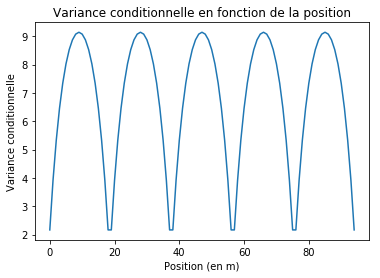

In [8]:
def matrice_covariance_cond(C_obs, C_unk, C_obs_unk):
    C_obs_unk_t = np.transpose(C_obs_unk)
    m_cov_cond = C_unk - np.matmul(np.matmul(C_obs_unk_t, np.linalg.inv(C_obs)), C_obs_unk)
    return(m_cov_cond)

M_cov_cond = matrice_covariance_cond(C_obs, C_unk, C_obs_unk)

def diagonale(M):
    D = []
    for i in range(len(M)):
        D.append(M[i][i])
    return(D)

Diag = diagonale(M_cov_cond)
abscisses2 = [k for k in range (len(Diag))]

plt.plot(abscisses2, Diag)
plt.title('Variance conditionnelle en fonction de la position')
plt.xlabel("Position (en m)")
plt.ylabel("Variance conditionnelle")
plt.show()

Au niveau des observations, l'incertitude est plus faible (car on connaît les valeurs) et donc l'écart moyen à la moyenne (racine de la variance) est faible. Plus on s'éloigne des observations, plus l'incertitude augmente ce qui est cohérent.

7. Effectuer une simulation conditionnelle. Sur un même graphique, tracer la simulation ainsi que les données et l'espérance conditionnelle. Commenter.

On va alors pouvoir utiliser le procédé décrit à la question 4 de la partie théorique, et en reprenant un peu la strucuture de la question 5 de la partie pratique.

In [9]:
from random import gauss #on utilise la fonction gauss de Python pour avoir une répartition de gauss des valeurs de Y

def simul_cond():
    p = len(observation_indexes)
    Y_list = [gauss(0,1) for k in range(N-p)]
    Y = np.array(Y_list)
    A = np.linalg.cholesky(M_cov_cond)
    
    m_T = np.transpose(np.array([mu]*p))
    m_X = np.transpose(np.array([mu]*(N-p))
    cond = m_X + np.matmul(np.matmul(C_obs_unk_t, np.linalg.inv(C_obs)), depth-m_T)
    moy_simul = cond + np.matmul(A, Y)
                       
    Z = []
    l_depth = depth.tolist()
    l_moy_simul = moy_simul.tolist()
                       
    for i in range(N):
        if i in observation_indexes:
            Z.append(l_depth.pop(0))
        else :
            Z.append(l_moy_simul.pop(0))
    return(Z)

Z = simul_cond()
abscisses3 = [k for k in range(N)]
                       
plt.plot(abscisses3, Z, label = 'Simulation')
plt.plot(abscisses, l_moycond, label = 'Espérance conditionnelle')
plt.scatter(observation_indexes, depth, label = 'Données', color = 'r')
plt.title('Comparaison simulation et espérance conditionnelle')
plt.xlabel('Position (en m)')
plt.ylabel('Profondeur (en m)')
plt.legend()
plt.show()

SyntaxError: invalid syntax (<ipython-input-9-735aac305e26>, line 11)

Même problème que précédemment ici...

On voit que la simulation suit la même tendance que l'espérance conditionnelle et les données. La simulation est également cohérante avec le sujet étudié qu'est le fond marin, car elle présente des irrégularités.

8. Ecrire une fonction qui calcule la longueur du câble en fonction du vecteur des profondeurs et du pas de discrétisation.

On applique la définition de la longuer de câble donnée par l'énoncé :
$$l=\sum_{i=1}^N\sqrt{\Delta^2+(z(x_i)-z(x_{i-1}))^2}.$$

In [11]:
def longueur_cable(delta, Z):
    s = 0
    for i in range(1, len(Z)):
        s = s + np.sqrt(delta**2 + (Z[i]-Z[i-1])**2)
    return(s)

l = longueur_cable(Delta, Z)

NameError: name 'Z' is not defined

Puis, on prend en compte les simulations, avec la définition donnée dans l'énoncé :
$$L=\sum_{i=1}^N\sqrt{\Delta^2+(Z(x_i)-Z(x_{i-1}))^2},$$
en notant $L$ la variable aléatoire donnant la longueur de câble nécéssaire.

In [12]:
def estimation_longueur_cable(delta):
    return(longueur_cable(delta, simul_cond()))

L = estimation_longueur_cable(Delta)
L

NameError: name 'simul_cond' is not defined

9. Utiliser cette fonction pour calculer la longueur du câble à partir de 100 simulations. Comparer l'espérance conditionnelle (estimée) de la longueur avec la longueur de l'espérance conditionnelle.

On va créer une fonction pour pouvoir ensuite l'appliquer sur d'autres simulations (comme ce qui est demandé à la question 14 de la partie pratique).
La construction de la fonction nous permettra également de faire la question 10 de la partie théorique.

In [13]:
def simulation(n):
    l = [] # liste qui va contenir les longueurs moyennes
    # la longueur est calculée à chaque fois qu'on fait une simulation de plus
    s = 0
    for i in range(n):
        s = s + estimation_longueur_cable(Delta)
        l.append(s/(i+1))
    return(l)

In [14]:
n = 100

longueur_conditionnelle = longueur_cable(Delta, l_moycond)
longueur_moyenne_estimee = simulation(n)[-1] # on ne récupère que le dernier terme
ecart = abs(longueur_conditionnelle - longueur_moyenne_estimee)

print('Espérance conditionnelle (estimée) de la longueur : ' + longueur_moyenne_estimee)
print("Longueur de l'espérance conditionnelle : " + longueur_conditionnelle)
print("Il y a un écart de " + ecart + "entre les deux longeurs.")

NameError: name 'l_moycond' is not defined

Si on répète la cellule plusieurs fois, on observe quasiment toujours les même valeurs, avec un écart presque constant.

10. Représenter la suite $M_n$ des moyennes des longueurs de câbles en fonction du nombre de simulations. Commenter.

In [15]:
nb_simul = [k for k in range(n)]
Mn = simulation(n)

plt.plot(nb_simul, Mn)
plt.title("Représentation de la suite Mn")
plt.xlabel("n")
plt.show()

NameError: name 'simul_cond' is not defined

11. Représenter l'histogramme des longueurs de câbles générées.

In [16]:
longueur_cables_generees = [estimation_longueur_cable(Delta) for k in range(n)]

longueurs_cables_triees = longueur_cables_generees.sort()
mini = min(longueurs_cables_triees)
maxi = max(longueurs_cables_triees)

plt.hist(longueurs_cables_triees, range = (mini, maxi), bins = 10)
plt.xlabel("Longueur (en m)")
plt.ylabel("Nombre d'occurences")
plt.title("Histogramme des longueurs de câbles générées pour "+ n + " simulations")
plt.show()

NameError: name 'simul_cond' is not defined

Il semble que la loi régissant les longueurs se rapporche d'une loi normale.

12. Donner un intervalle de confiance à 95% de la longueur du câble par 2 méthodes différentes. Commenter.

- Méthode 1 :

On exploite la remarque de la question précédente en approximant la loi relative à la longueur par une loi gaussienne de moyenne $\mu$ et d'écart-type $\sigma$ à déterminer.
On sait alors que l'intervalle de confiance de l'espérance $\mu$ à 95% est défini par
$$I_{95} = \left[\mu - 2\frac{\sigma}{\sqrt n} ; \mu + 2\frac{\sigma}{\sqrt n}\right]$$ où $n$ correspond à l'échantillon (ici répétitions), avec $n > 100$ (ici $n = 100$).

In [17]:
def moyvar(X):
    s = 0
    s2 = 0
    x = len(X)
    for i in range(x):
        s = s + X[i]
        s2 = s2 + X[i]**2
    moy = s/x
    moy2 = s2/x
    var = moy2 - moy**2
    ecarttype = np.sqrt(var)
    return(moy, ecarttype)

In [18]:
liste_longueur_cable = []
for i in range(n):
    liste_longueur_cable.append(estimation_longueur_cable(Delta))

mu1 = moyvar(liste_longueur_cable)[0]
sigma1 = moyvar(liste_longueur_cable)[1]

borneinf = mu1-2*sigma1/np.sqrt(n)
bornesup = mu1+2*sigma1/np.sqrt(n)
intervalle1 = [borneinf, bornesup]

print("L'intervalle de confiance à 95% par la première méthode est : " + intervalle1)

NameError: name 'simul_cond' is not defined

- Méthode 2 :

On va regarder toutes les valeurs de longueurs générées (c'est plus simple si la liste est déjà triée) et ensuite prendre l'intervalle telle que 95% des données soient dedans.
On peut le faire de plusieurs façons :
- partir de la valeur médiane de la liste pour élargir sur les côtés
- considéré les valeurs des extrémités à supprimer (2,5% se trouve "sur la gauche" (ou ce sont les 2,5% des valeurs les plus petites) et 2,5% se trouve "sur la droite" (ou ce sont les 2,5% des valeurs les plus élevées)
- et bien d'autres (paritr des extrémités et restreindre, partir non plus de la médiane mais de la moyenne...)

On choisit ici de faire la deuxième méthode.

In [20]:
extremiteinf = int(0.025 * n)
extremitesup = int(0.975 * n)
intervalle2 = [liste_longueur_cable[extremiteinf], liste_longueur_cable[extremitesup]]

print("L'intervalle de confiance à 95% par la seconde méthode est : " + intervalle2)

IndexError: list index out of range

On peut se poser la question de la pertinance de l'intervalle de confiance évalué avec la première méthode qui utilise une approximation par une loi de Gauss : on a ici $n = 100$ alors qu'elle est généralement valable pour $n > 100$ (voire $n\gg100$).

13. Donner une estimation de la probabilité que la longueur du câble dépasse 525 m.

In [21]:
def probabilite(l):
    s = 0
    for i in range(len(l)):
        if l[i] > 525 :
            s = s + 1
    p = s/len(l)
    return(p)

In [22]:
p = probabilite(liste_longueur_cable)
print("Une estimation de la probabilité demandée est" + p)

ZeroDivisionError: division by zero

14. Reprendre les questions précédentes avec 1000, 10000 puis 100000 simulations. Commenter.

#### Pour 1000 simulations

In [ ]:
n = 1000

In [ ]:
longueur_moyenne_estimee = simulation(n)[-1] # on ne récupère que le dernier terme
ecart = abs(longueur_conditionnelle - longueur_moyenne_estimee)

print('Espérance conditionnelle (estimée) de la longueur : ' + longueur_moyenne_estimee)
print("Longueur de l'espérance conditionnelle : " + longueur_conditionnelle)
print("Il y a un écart de " + ecart + "entre les deux longeurs.")

In [ ]:
nb_simul = [k for k in range(n)]
Mn = simulation(n)

plt.plot(nb_simul, Mn)
plt.title("Représentation de la suite Mn")
plt.xlabel("n")
plt.show()

In [ ]:
longueur_cables_generees = [estimation_longueur_cable(Delta) for k in range(n)]

longueurs_cables_triees = longueur_cables_generees.sort()
mini = min(longueurs_cables_triees)
maxi = max(longueurs_cables_triees)

plt.hist(longueurs_cables_triees, range = (mini, maxi), bins = 10)
plt.xlabel("Longueur (en m)")
plt.ylabel("Nombre d'occurences")
plt.title("Histogramme des longueurs de câbles générées pour "+ n + " simulations")
plt.show()

In [ ]:
liste_longueur_cable = []
for i in range(n):
    liste_longueur_cable.append(estimation_longueur_cable(Delta))

mu1 = moyvar(liste_longueur_cable)[0]
sigma1 = moyvar(liste_longueur_cable)[1]

borneinf = mu1-2*sigma1/np.sqrt(n)
bornesup = mu1+2*sigma1/np.sqrt(n)
intervalle1 = [borneinf, bornesup]

print("L'intervalle de confiance à 95% par la première méthode est : " + intervalle1)

In [ ]:
extremiteinf = int(0.025 * n)
extremitesup = int(0.075 * n)
intervalle2 = [liste_longueur_cable[extremiteinf], liste_longueur_cable[extremitesup]]

print("L'intervalle de confiance à 95% par la seconde méthode est : " + intervalle2)

In [ ]:
p = probabilite(liste_longueur_cable)
print("Une estimation de la probabilité demandée est" + p)

#### Pour 10000 simulations

In [ ]:
n = 10000

In [ ]:
longueur_moyenne_estimee = simulation(n)[-1] # on ne récupère que le dernier terme
ecart = abs(longueur_conditionnelle - longueur_moyenne_estimee)

print('Espérance conditionnelle (estimée) de la longueur : ' + longueur_moyenne_estimee)
print("Longueur de l'espérance conditionnelle : " + longueur_conditionnelle)
print("Il y a un écart de " + ecart + "entre les deux longeurs.")

In [ ]:
nb_simul = [k for k in range(n)]
Mn = simulation(n)

plt.plot(nb_simul, Mn)
plt.title("Représentation de la suite Mn")
plt.xlabel("n")
plt.show()

In [ ]:
longueur_cables_generees = [estimation_longueur_cable(Delta) for k in range(n)]

longueurs_cables_triees = longueur_cables_generees.sort()
mini = min(longueurs_cables_triees)
maxi = max(longueurs_cables_triees)

plt.hist(longueurs_cables_triees, range = (mini, maxi), bins = 10)
plt.xlabel("Longueur (en m)")
plt.ylabel("Nombre d'occurences")
plt.title("Histogramme des longueurs de câbles générées pour "+ n + " simulations")
plt.show()

In [ ]:
liste_longueur_cable = []
for i in range(n):
    liste_longueur_cable.append(estimation_longueur_cable(Delta))

mu1 = moyvar(liste_longueur_cable)[0]
sigma1 = moyvar(liste_longueur_cable)[1]

borneinf = mu1-2*sigma1/np.sqrt(n)
bornesup = mu1+2*sigma1/np.sqrt(n)
intervalle1 = [borneinf, bornesup]

print("L'intervalle de confiance à 95% par la première méthode est : " + intervalle1)

In [ ]:
extremiteinf = int(0.025 * n)
extremitesup = int(0.075 * n)
intervalle2 = [liste_longueur_cable[extremiteinf], liste_longueur_cable[extremitesup]]

print("L'intervalle de confiance à 95% par la seconde méthode est : " + intervalle2)

In [ ]:
p = probabilite(liste_longueur_cable)
print("Une estimation de la probabilité demandée est" + p)

#### Pour 100000 simulations

In [ ]:
n = 100000

In [ ]:
longueur_moyenne_estimee = simulation(n)[-1] # on ne récupère que le dernier terme
ecart = abs(longueur_conditionnelle - longueur_moyenne_estimee)

print('Espérance conditionnelle (estimée) de la longueur : ' + longueur_moyenne_estimee)
print("Longueur de l'espérance conditionnelle : " + longueur_conditionnelle)
print("Il y a un écart de " + ecart + "entre les deux longeurs.")

In [ ]:
nb_simul = [k for k in range(n)]
Mn = simulation(n)

plt.plot(nb_simul, Mn)
plt.title("Représentation de la suite Mn")
plt.xlabel("n")
plt.show()

In [ ]:
longueur_cables_generees = [estimation_longueur_cable(Delta) for k in range(n)]

longueurs_cables_triees = longueur_cables_generees.sort()
mini = min(longueurs_cables_triees)
maxi = max(longueurs_cables_triees)

plt.hist(longueurs_cables_triees, range = (mini, maxi), bins = 10)
plt.xlabel("Longueur (en m)")
plt.ylabel("Nombre d'occurences")
plt.title("Histogramme des longueurs de câbles générées pour "+ n + " simulations")
plt.show()

In [ ]:
liste_longueur_cable = []
for i in range(n):
    liste_longueur_cable.append(estimation_longueur_cable(Delta))

mu1 = moyvar(liste_longueur_cable)[0]
sigma1 = moyvar(liste_longueur_cable)[1]

borneinf = mu1-2*sigma1/np.sqrt(n)
bornesup = mu1+2*sigma1/np.sqrt(n)
intervalle1 = [borneinf, bornesup]

print("L'intervalle de confiance à 95% par la première méthode est : " + intervalle1)

In [ ]:
extremiteinf = int(0.025 * n)
extremitesup = int(0.075 * n)
intervalle2 = [liste_longueur_cable[extremiteinf], liste_longueur_cable[extremitesup]]

print("L'intervalle de confiance à 95% par la seconde méthode est : " + intervalle2)

In [ ]:
p = probabilite(liste_longueur_cable)
print("Une estimation de la probabilité demandée est" + p)

On remarque qu'on obtient effectivement le comportemant d'une loi normale. Plus on va faire un nombre important de simulations, plus les valeurs vont se resserrer autour de la moyenne, premetttant d'obtenir une approximation de L plus fine (et donc plus précise).